In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from matplotlib import ticker
%matplotlib inline

1. calculate physical variables:

python mac/calc_phys_vars.py -werez --option="q(z) - Pmiss(x-z) frame" -scheme=SRCXb --DataType=NoCTofDATA -evf=1 -p5000 -A12


2. scheme to ppp-candidates cut

python mac/ppp_analysis.py --option=scheme

# load or trees, apply required cuts and modify variable names

In [38]:
variables = ['A'            
             #              ,'total particle num.'
             ,'Np'
             ,'Xb' 
             #              ,'q.P()','q.E()'
             ,'Q2'  
             ,'Pmiss.P()'    ,'Pmiss.Pt()' 
             ,'theta_pq'     ,'p_over_q'             
             #              ,'Pcm.Mag()','PcmFinalState.P()' , 'PcmFinalState.Pt()'            
             #              ,'Pcm.Px()' , 'Pcm.Py()'  , 'Pcm.Pz()', 'Pcm.Pt()', 'Pcm.P()'
             ,'pEdep[0]', 'pEdep[1]', 'pEdep[2]'
             ,'pCTOFCut[0]', 'pCTOFCut[1]', 'pCTOFCut[2]'            
             #              ,'pEdep','protons.P()'
             ,'protons[0].P()', 'protons[1].P()','protons[2].P()'
             #              ,'protons[0].Theta()','protons[1].Theta()','protons[2].Theta()'
             #              ,'TMath::RadToDeg()*protons[0].Theta()', 'TMath::RadToDeg()*protons[1].Theta()',  'TMath::RadToDeg()*protons[2].Theta()' 
             #              ,'alpha[0]','alpha[1]','alpha[2]','alpha_q'
             ,'theta23'
             ,'pVertex[0].Z()','pVertex[1].Z()','pVertex[2].Z()'
             ,'T23','E_R','m23','k23'
             ,'Mmiss2','Mmiss3','Emiss'
             ,'alpha_3N','W2_3N','k_t','beta'
            ]

In [39]:
# allfile = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_SRCXb_NoCTofDATA_C12.root')
allfile = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_SRCXb_DATA_C12.root')
alltree = allfile.Get('anaTree') 
allana = tree2array( alltree, branches=variables )

In [40]:
print len(allana),'events'

162247 events


## cuts

In [41]:
ana_XbPmiss = allana[(allana['Xb']>1.05) 
                     & (allana['Pmiss.P()']>0.3) & (allana['Pmiss.P()']<1.0) 
                     & (allana['Pmiss.Pt()'] < 0.4)]
print len(ana_XbPmiss),'events with x>1.05 and 1 > Pmiss > 0.3 GeV/c & Pmiss(t)<0.4 GeV/c'

29945 events with x>1.05 and 1 > Pmiss > 0.3 GeV/c & Pmiss(t)<0.4 GeV/c


In [42]:
ana_3p = ana_XbPmiss[(ana_XbPmiss['Np']>=3)]
print len(ana_3p),'events with 3p'

156 events with 3p


In [43]:
ana_Plead = ana_3p[(ana_3p['theta_pq']<25)
                   & (0.62<ana_3p['p_over_q']) & (ana_3p['p_over_q']<0.96)]
print len(ana_Plead),'events with P(lead) identified'

31 events with P(lead) identified


In [44]:
selected =  ana_Plead[  (ana_Plead['pCTOFCut[0]']==1) 
                      & (ana_Plead['pCTOFCut[1]']==1) 
                      & (ana_Plead['pCTOFCut[2]']==1)
                      & (ana_Plead['pVertex[0].Z()']>-27) & (ana_Plead['pVertex[0].Z()']<-20) 
                      & (ana_Plead['pVertex[1].Z()']>-27) & (ana_Plead['pVertex[1].Z()']<-20) 
                      & (ana_Plead['pVertex[2].Z()']>-27) & (ana_Plead['pVertex[2].Z()']<-20)  
                      & (ana_Plead['protons[1].P()']>0.3) & (ana_Plead['protons[2].P()']>0.3)
               ]
print len(selected),'selected'

13 selected


# $E_{miss}$ vs. $\theta_{23}$

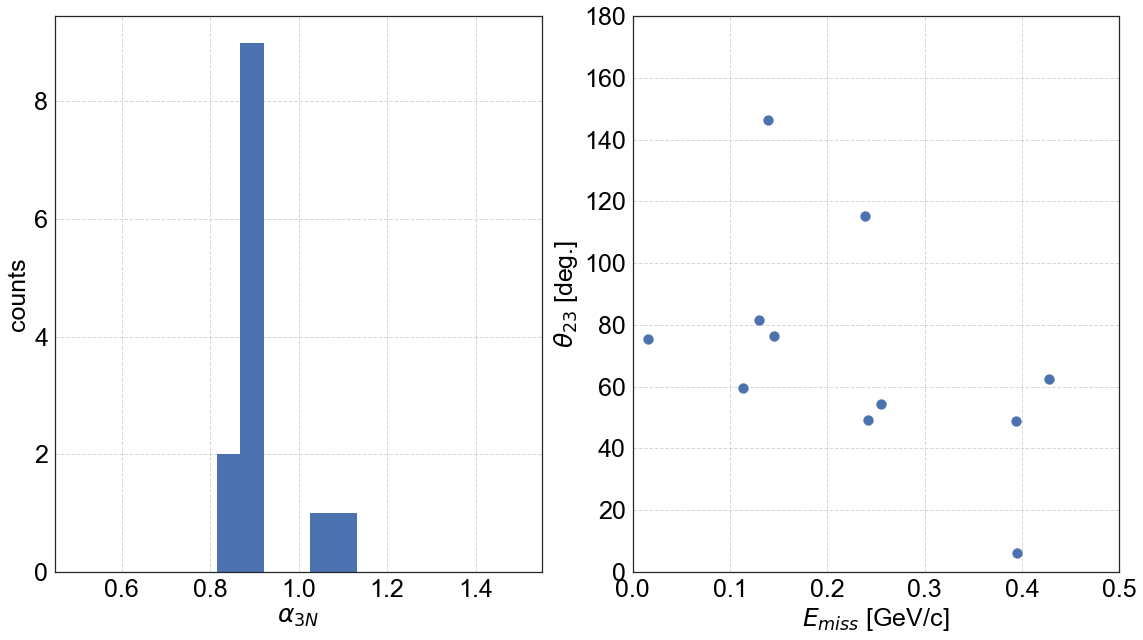

In [54]:
fig=plt.figure(figsize=(16,9))

ax = fig.add_subplot(1,2,1)
plt.hist(selected['alpha_3N'],bins=np.linspace(0.5,1.5,20));
set_axes(ax,r'$\alpha_{3N}$','counts',do_add_grid=True)

ax = fig.add_subplot(1,2,2)
plt.scatter(selected['Emiss'],selected['theta23'],s=100);
set_axes(ax,r'$E_{miss}$ [GeV/c]',r'$\theta_{23}$ [deg.]',do_add_grid=True
         ,xlim=(0.0,0.5),ylim=(0,180))

plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/ppp_candidates_alpha3N_Emiss_theta23.pdf')

## Bjorken x

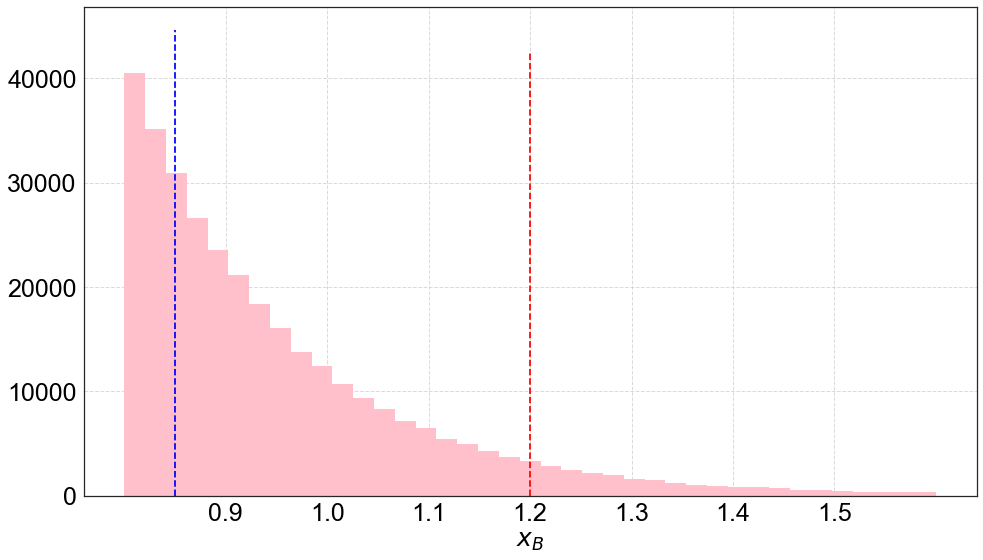

In [8]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
# sample = selected
ax.hist(sample['Xb'],bins=np.linspace(0.8,1.6,40),color='pink');
set_axes(ax,'$x_B$')
ax.xaxis.set_ticks([0.9,1,1.1,1.2,1.3,1.4,1.5]);
plt.plot([1.2,1.2],ax.get_ylim(),'--',color='red')
plt.plot([0.85,0.85],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

## leading proton ID

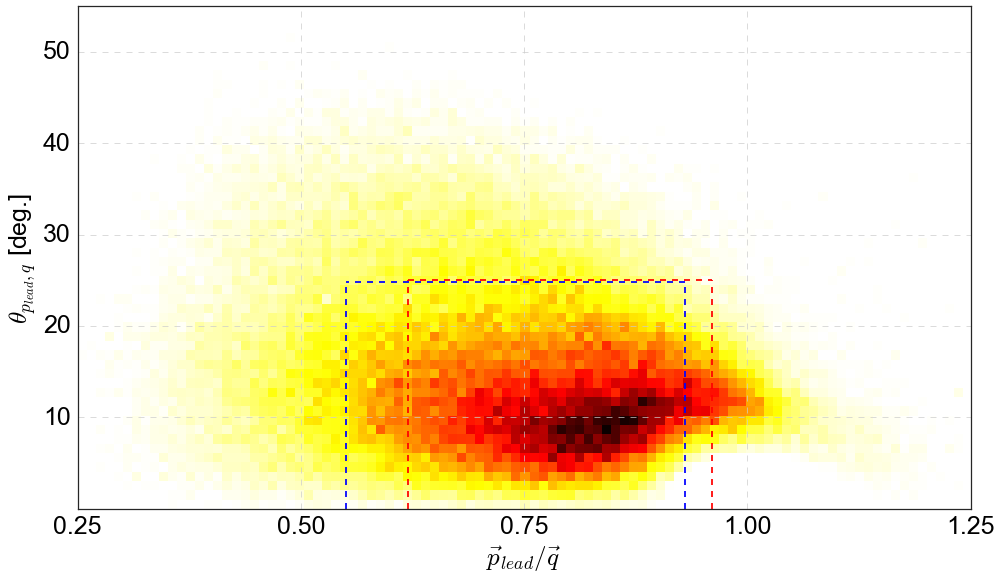

In [12]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana[(allana['Pmiss.P()']>0.3)&(allana['Pmiss.P()']<1.0)
               &(allana['pCTOFCut[0]']==1)
               &(allana['pVertex[0].Z()']>-27)&(allana['pVertex[0].Z()']<-20)]
plot_2d_hist(sample['p_over_q'],sample['theta_pq'],ax=ax,xlabel='$\\vec{p}_{lead}/\\vec{q}$',ylabel='$\\theta_{p_{lead},q}$ [deg.]'
             ,bins=(np.linspace(0.25,1.25,100),np.linspace(0,55,55)));
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25]);ax.yaxis.set_ticks([10,20,30,40,50]);
plt.plot([0.62,0.62],[0,25],'--',color='red')
plt.plot([0.62,0.96],[25,25],'--',color='red')
plt.plot([0.96,0.96],[0,25],'--',color='red')
plt.plot([0.93,0.93],[0,24.8],'--',color='blue')
plt.plot([0.93,0.55],[24.8,24.8],'--',color='blue')
plt.plot([0.55,0.55],[0,24.8],'--',color='blue')
ax.grid(linestyle='--',alpha=0.7)

## Pmiss

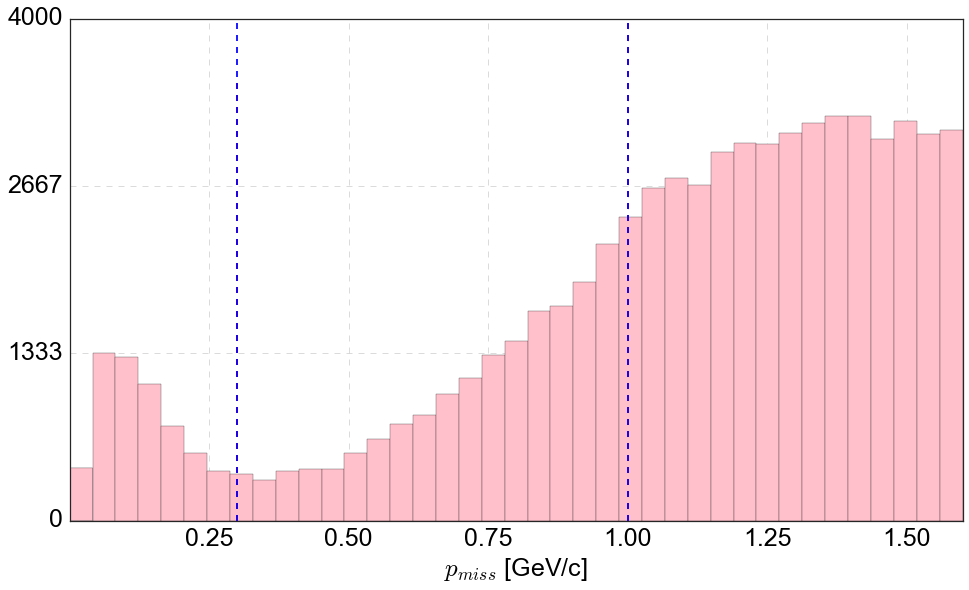

In [45]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Pmiss.P()'],bins=np.linspace(0.,1.6,40),color='pink');
set_axes(ax,'$p_{miss}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25,1.5]);
plt.plot([.3,.3],ax.get_ylim(),'--',color='red')
plt.plot([1.,1.],ax.get_ylim(),'--',color='red')
plt.plot([.3,.3],ax.get_ylim(),'--',color='blue')
plt.plot([1.,1.],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

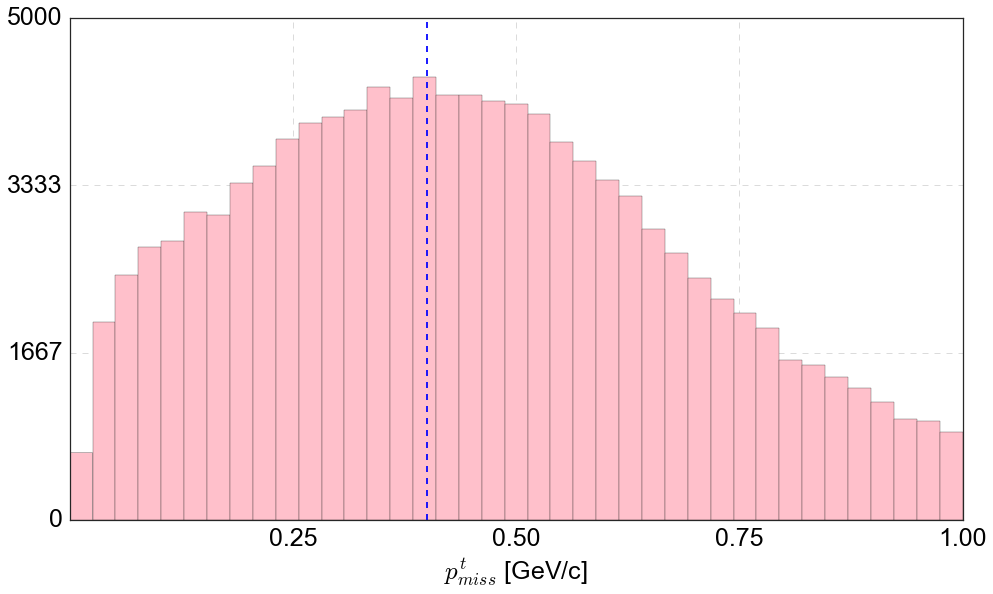

In [52]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Pmiss.Pt()'],bins=np.linspace(0.,1.,40),color='pink');
set_axes(ax,'$p_{miss}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25,1.5]);
plt.plot([.0,.0],ax.get_ylim(),'--',color='red')
plt.plot([.4,.4],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

## vertex

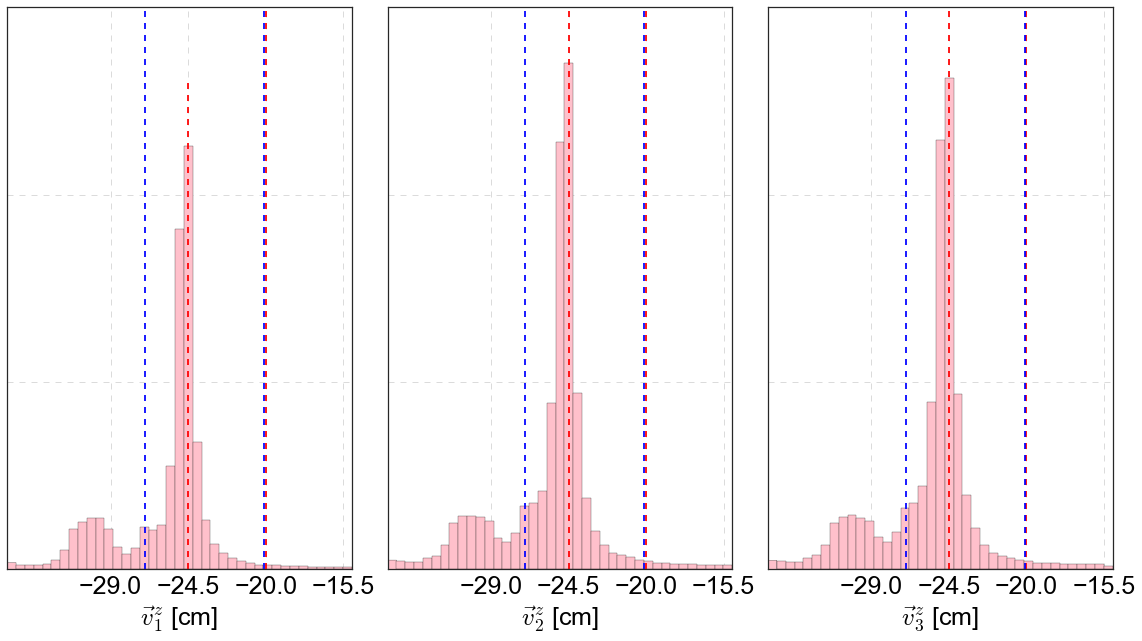

In [65]:
fig=plt.figure(figsize=(16,9))
sample = allana
for i in range(3):
    ax=fig.add_subplot(1,3,i+1)
    ax.hist(sample['pVertex[%d].Z()'%i],bins=np.linspace(-35,-15,40),color='pink');
    set_axes(ax,'$\\vec{v}_{%d}^{z}$ [cm]'%(i+1),y_label='')
    ax.grid(linestyle='--',alpha=0.7)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_ticks([-29,-24.5,-20,-15.5]);
    plt.plot([-24.5,-24.5],ax.get_ylim(),'--',color='red')
    plt.plot([-20,-20],ax.get_ylim(),'--',color='red')
    plt.plot([-27,-27],ax.get_ylim(),'--',color='blue')
    plt.plot([-20.1,-20.1],ax.get_ylim(),'--',color='blue')
plt.tight_layout()

# selected ppp-candidates

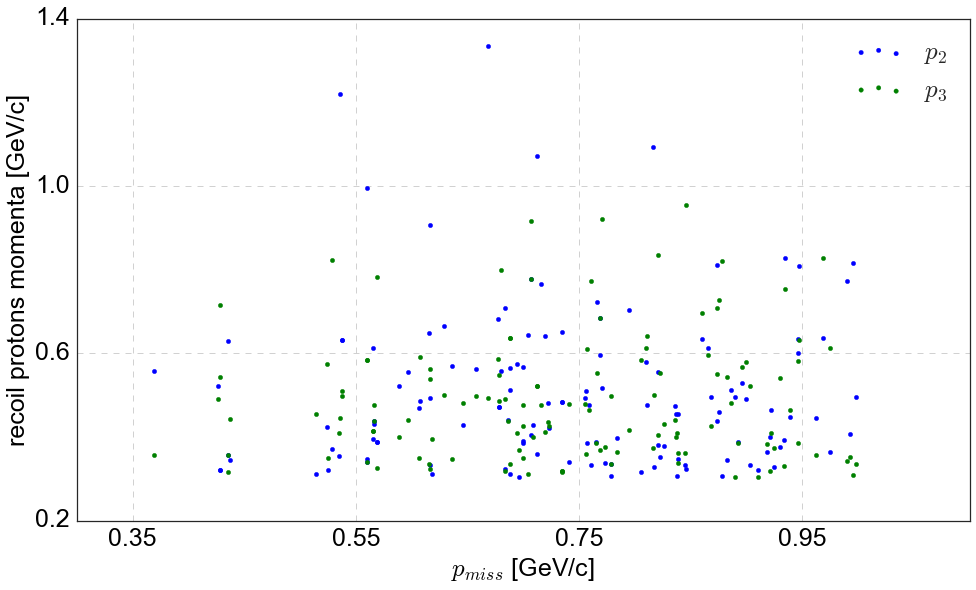

In [8]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['Pmiss.P()'],selected['protons[1].P()'],color='blue',label='$p_2$')
plt.scatter(selected['Pmiss.P()'],selected['protons[2].P()'],color='green',label='$p_3$')
set_axes(ax,'$p_{miss}$ [GeV/c]','recoil protons momenta [GeV/c]')
ax.xaxis.set_ticks([0.35,0.55,0.75,0.95]);
ax.grid(linestyle='--',alpha=0.9)
ax.legend(fontsize=25,scatterpoints=3)

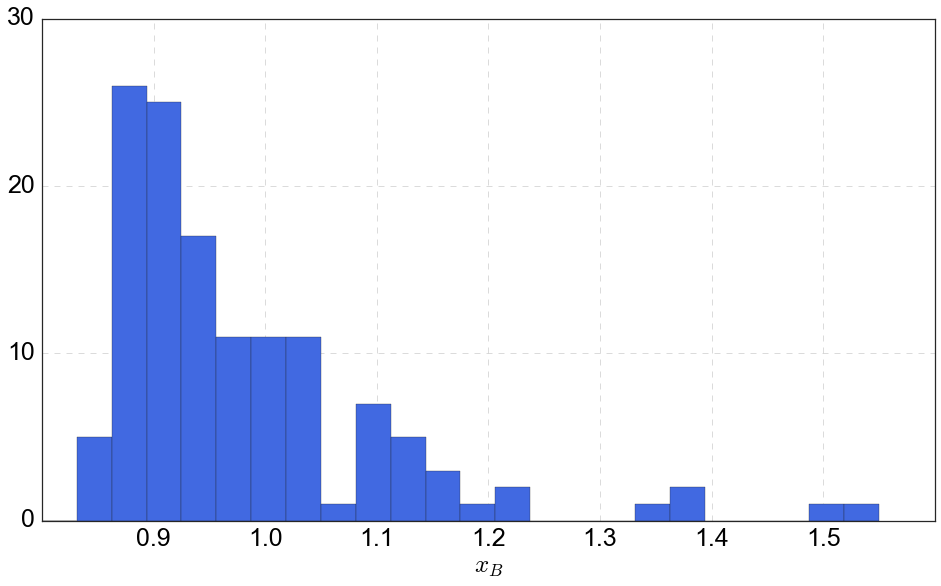

In [9]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['Xb'],bins=np.linspace(0.8,1.55,25),color='royalblue');
set_axes(ax,'$x_B$')
ax.xaxis.set_ticks([0.9,1,1.1,1.2,1.3,1.4,1.5]);
ax.grid(linestyle='--',alpha=0.7)

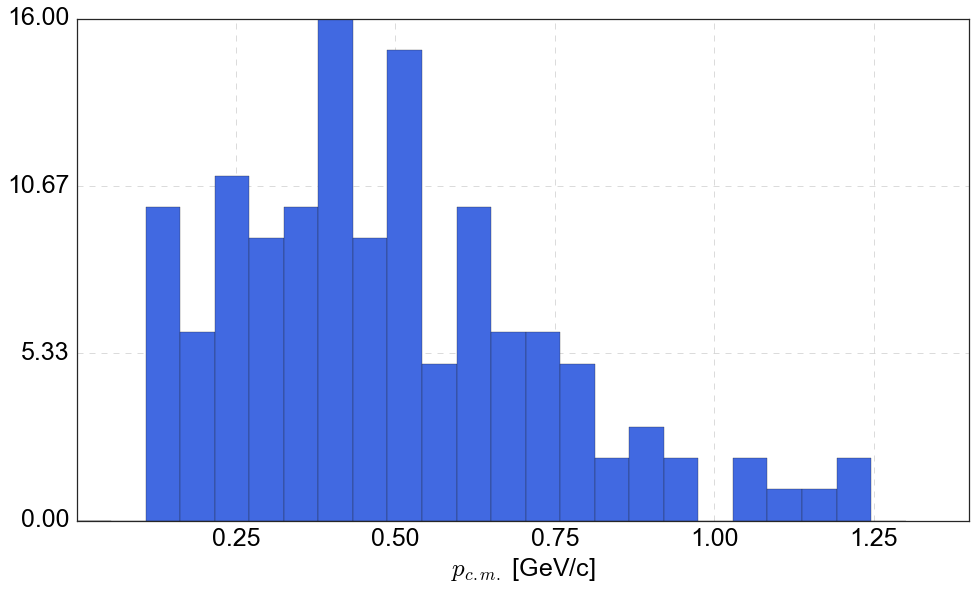

In [10]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['Pcm.P()'],bins=np.linspace(0.,1.3,25),color='royalblue');
set_axes(ax,'$p_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25]);
ax.grid(linestyle='--',alpha=0.7)

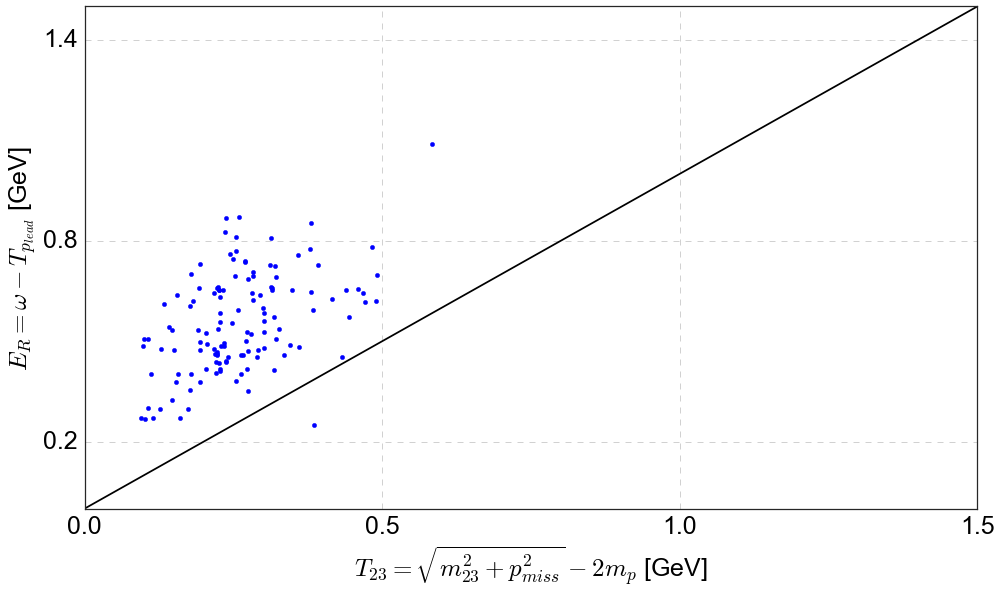

In [4]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['T23'],selected['E_R'],color='blue')
set_axes(ax,'$T_{23} = \\sqrt{m_{23}^{2} + p_{miss}^{2}} - 2m_p $ [GeV]','$E_R = \\omega - T_{p_{lead}}$ [GeV]')
ax.yaxis.set_ticks([0.2,0.8,1.4,2]);
ax.set_xlim(0,1.5);ax.set_ylim(0,1.5)
plt.plot(ax.get_xlim(),ax.get_xlim(),color='black')
ax.grid(linestyle='--',alpha=0.9)

(1.9, 2.8)

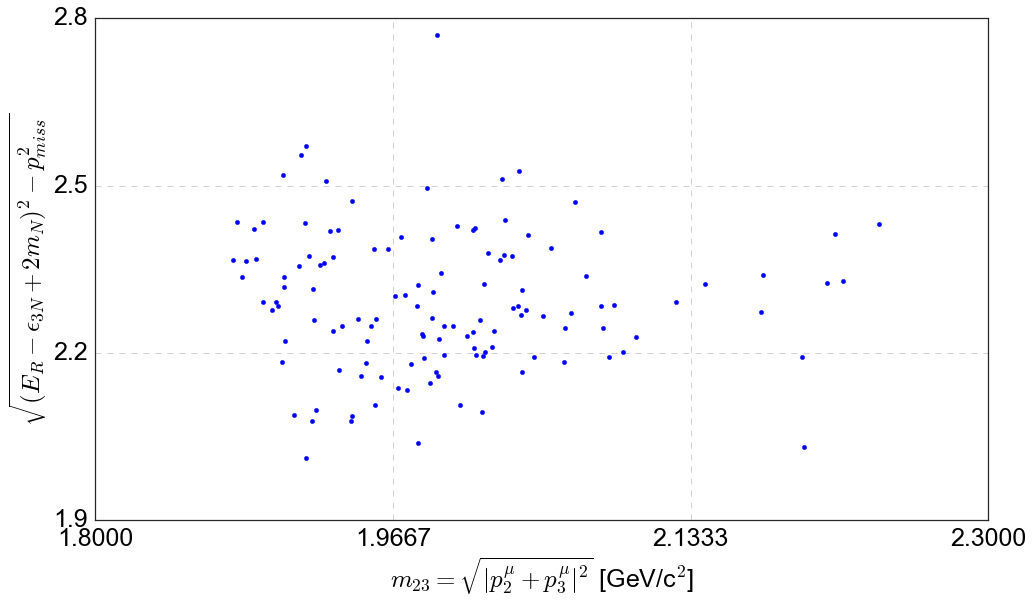

In [6]:
fig,ax=plt.subplots(figsize=(16,9))
eps_B = 0.0077 # 12C binding energy per nucleon
eps_3N = 3 * eps_B
plt.scatter(selected['m23'],np.sqrt( np.square(selected['E_R'] - eps_3N + 2*0.938) - np.square(selected['Pmiss.P()']) ),color='blue')
set_axes(ax,'$m_{23} = \\sqrt{|p_{2}^{\\mu}+p_{3}^{\\mu}|^{2}}$ [GeV/c$^{2}$]','$\\sqrt{ (E_R - \epsilon_{3N} + 2m_N)^{2} - p_{miss}^{2}}$')
ax.grid(linestyle='--',alpha=0.9)
ax.set_xlim(1.8,2.3);ax.set_ylim(1.9,2.8)

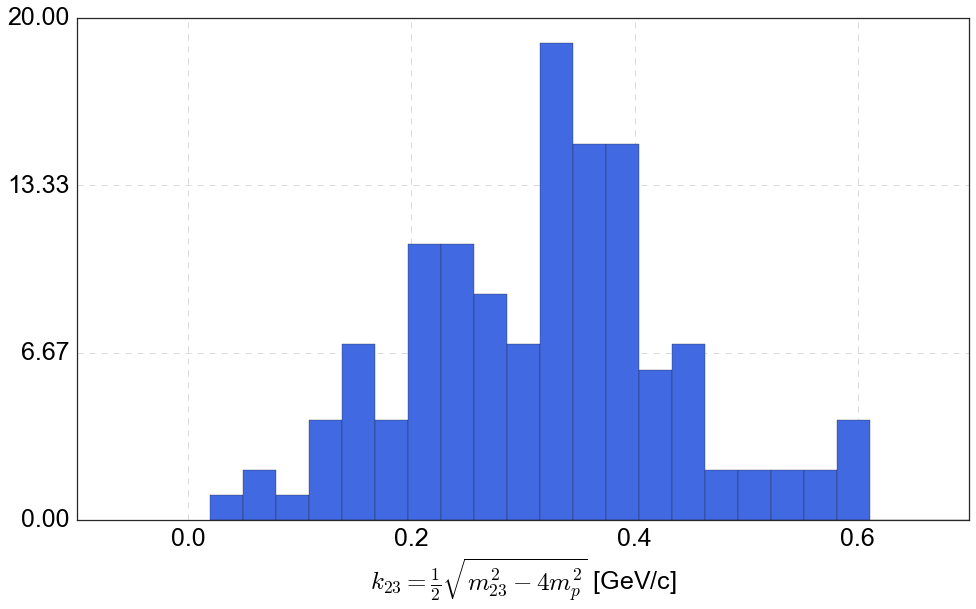

In [4]:
fig,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['k23'],bins=np.linspace(-0.01,0.7,25),color='royalblue');
set_axes(ax,'$k_{23} = \\frac{1}{2}\\sqrt{m_{23}^2 - 4m_p^2}$ [GeV/c]')
ax.xaxis.set_ticks([0.,0.2,0.4,0.6]);
ax.grid(linestyle='--',alpha=0.7)

## W2

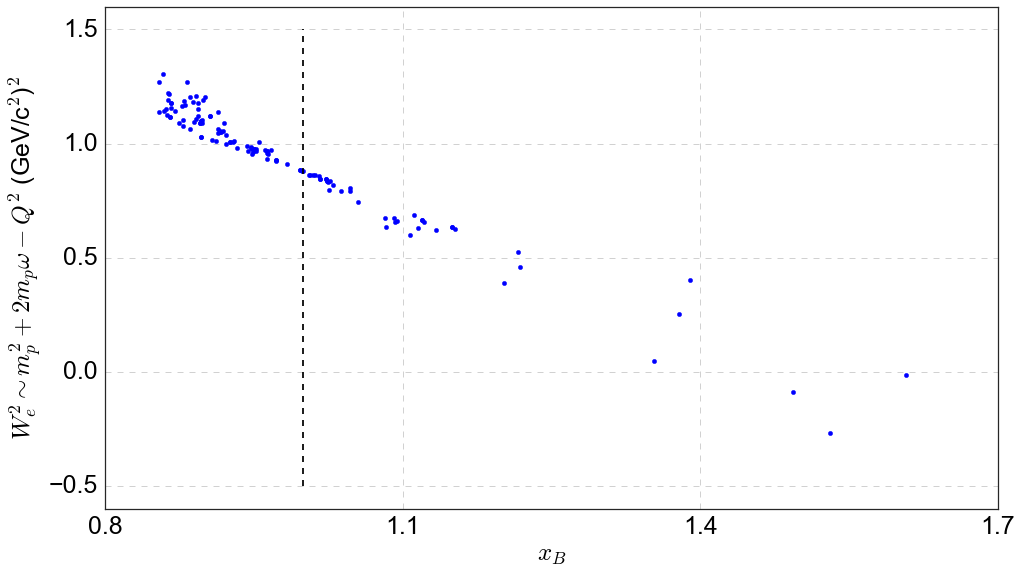

In [23]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['Xb'],0.938*0.938 + 2.*0.938*selected['q.E()']-selected['Q2'],color='blue')
set_axes(ax,'$x_B$' ,'$W_e^2 \sim m_p^2 + 2m_p\\omega - Q^2$ (GeV/c$^2$)$^2$')
ax.yaxis.set_ticks([-0.5,0.,0.5,1.,1.5]);
plt.plot([1,1],ax.get_ylim(),color='black',linestyle='--')
ax.grid(linestyle='--',alpha=0.9)

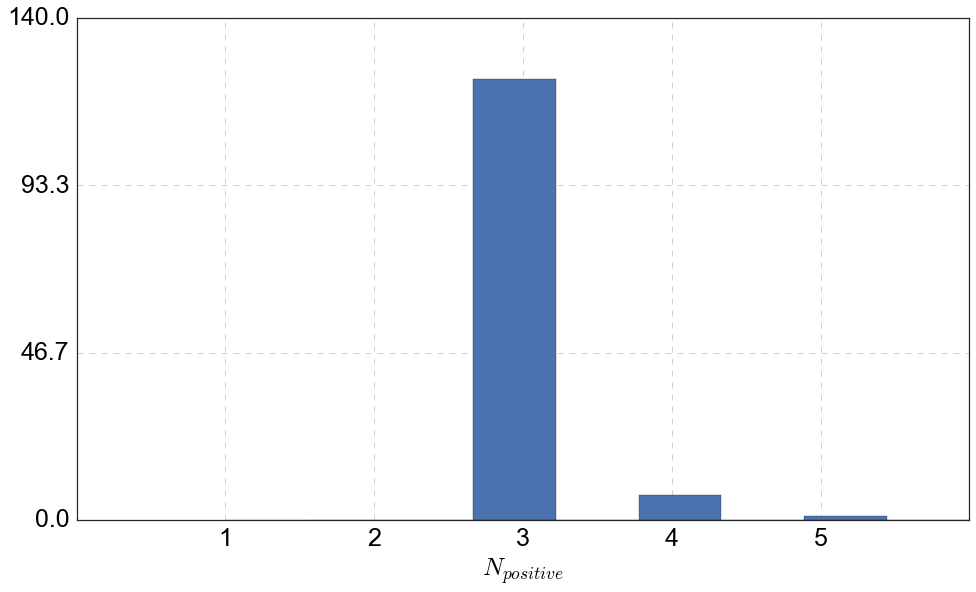

In [43]:
fig,ax=plt.subplots(figsize=(16,9))
plt.hist(selected['Np'],bins=np.linspace(1,6,10))
set_axes(ax,'$N_{positive}$')
ax.xaxis.set_ticks([1,2,3,4,5]);
ax.grid(linestyle='--',alpha=0.9)

In [3]:
selected_file = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_pppSRCCut_NoCTofDATA_C12.root')
selected_tree = selected_file.Get('anaTree') 
selected = tree2array( selected_tree, branches=variables )

ValueError: the branch or expression 'beta' is not present or valid

## Mmiss

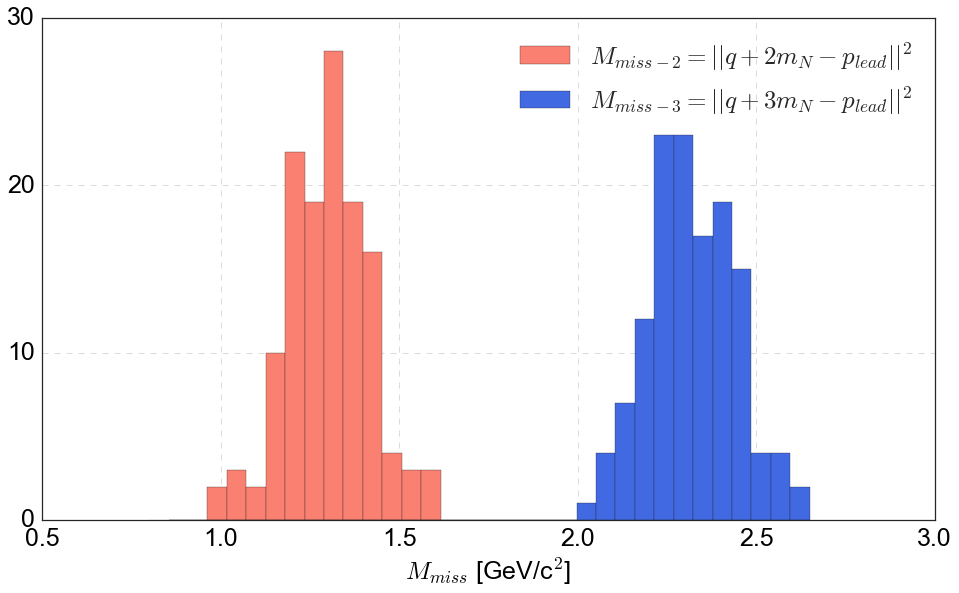

In [66]:
fig,ax=plt.subplots(figsize=(16,9))
bins=np.linspace(.8,2.65,35)
ax.hist(selected['Mmiss2'],bins=bins,color='salmon',label='$M_{miss-2} = ||q + 2m_{N} - p_{lead}|| ^{2} $');
ax.hist(selected['Mmiss3'],bins=bins,color='royalblue',label='$M_{miss-3} = ||q + 3m_{N} - p_{lead}|| ^{2} $'); #,histtype='step',linewidth=3
set_axes(ax,'$M_{miss} $ [GeV/c$^2$]')
ax.xaxis.set_ticks([0.5,1,1.5,2,2.5,3]);
ax.grid(linestyle='--',alpha=0.7)
ax.legend(fontsize=25,loc='upper right')